### Data analysing

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame
df = pd.read_csv('wrangleddata.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,City,Total Price,Order Hour
0,175496,Lightning Charging Cable,1,14.95,04/11/19 09:11,"509 Jefferson St, Dallas, TX 75001",Apr,Dallas,14.95,9
1,175497,AA Batteries (4-pack),1,3.84,04/08/19 17:46,"941 Church St, Atlanta, GA 30301",Apr,Atlanta,3.84,17
2,175498,AA Batteries (4-pack),1,3.84,04/23/19 23:44,"770 6th St, Atlanta, GA 30301",Apr,Atlanta,3.84,23
3,175499,USB-C Charging Cable,1,11.95,04/22/19 22:50,"572 North St, Dallas, TX 75001",Apr,Dallas,11.95,22
4,175500,AA Batteries (4-pack),1,3.84,04/13/19 06:34,"361 14th St, San Francisco, CA 94016",Apr,San Francisco,3.84,6


##  What was the best month for sales? How much was earned that month?

In [33]:
total_month = df.groupby(by='month', as_index=False).agg({'Total Price':sum, 'Quantity Ordered':sum})
total_month.sort_values(['Total Price'], ascending=False)

,month,Total Price,Quantity Ordered
2,Dec,6.086643e+06,35971
7,Mar,3.818300e+06,23644
9,Nov,3.568217e+06,21513
0,Apr,2.867977e+06,17573
6,Jun,2.764859e+06,16572
5,Jul,2.522829e+06,15443
11,Sep,1.797220e+06,10534
1,Aug,1.765668e+06,10470
4,Jan,1.527476e+06,9174
3,Feb,1.206623e+06,7355


Text(0, 0.5, 'Quantity Ordered')

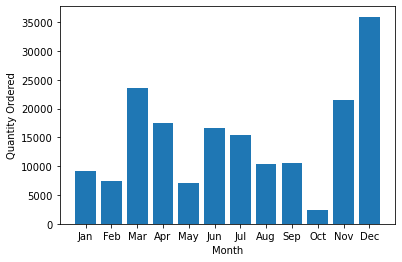

In [34]:
total_month["month no."] = pd.to_datetime(total_month['month'], format='%b').dt.month
total_month.sort_values(['month no.'], inplace=True)
plt.bar(total_month['month'],total_month['Quantity Ordered'])
plt.xlabel('Month')
plt.ylabel('Quantity Ordered')

## What city sold the most product?

In [35]:
total_city = df.groupby(by='City', as_index=False).agg({'Quantity Ordered':sum, 'Total Price':sum})
total_city.sort_values(['Quantity Ordered'], ascending=False, inplace=True)
total_city

,City,Quantity Ordered,Total Price
7,San Francisco,42686,7.046639e+06
4,Los Angeles,28413,4.677104e+06
5,New York City,23781,4.028604e+06
2,Boston,18994,3.160842e+06
3,Dallas,14224,2.381736e+06
8,Seattle,14202,2.281318e+06
0,Atlanta,14183,2.362523e+06
6,Portland,11752,1.944708e+06
1,Austin,9631,1.640983e+06


<BarContainer object of 9 artists>

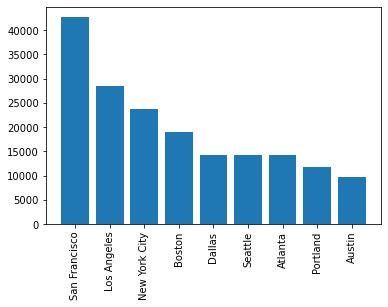

In [36]:
plt.xticks(rotation='vertical')
plt.bar(total_city['City'],total_city['Quantity Ordered'])

## What product sold the most? Why do you think it sold the most?

In [37]:
total_product = df.groupby(by='Product', as_index=False).agg({'Quantity Ordered':sum, 'Total Price':sum})
total_product.sort_values(['Quantity Ordered'], ascending=False, inplace=True)
total_product.reset_index(drop=True, inplace=True)
total_product

,Product,Quantity Ordered,Total Price
0,AAA Batteries (4-pack),26061,77922.39
1,AA Batteries (4-pack),23743,91173.12
2,USB-C Charging Cable,20341,243074.95
3,Lightning Charging Cable,19712,294694.40
4,Wired Headphones,17551,210436.49
5,Apple Airpods Headphones,13359,2003850.00
6,Bose SoundSport Headphones,11391,1138986.09
7,27in FHD Monitor,6463,969385.37
8,iPhone,5938,4156600.00
9,34in Ultrawide Monitor,5252,1995707.48


<BarContainer object of 19 artists>

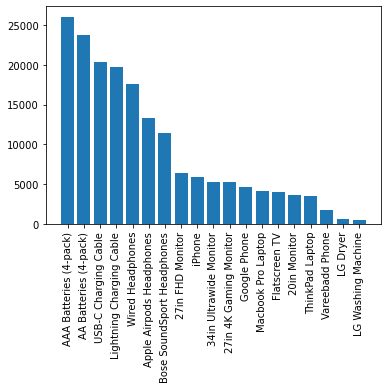

In [38]:
plt.xticks(rotation='vertical')
plt.bar(total_product['Product'],total_product['Quantity Ordered'])

## What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [39]:
most_sales_hour = df.groupby(by='Order Hour', as_index=False).agg({'Order ID':'count',})
most_sales_hour

,Order Hour,Order ID
0,0,3384
1,1,2006
2,2,1176
3,3,668
4,4,656
5,5,1115
6,6,2008
7,7,3410
8,8,5233
9,9,7588


[]

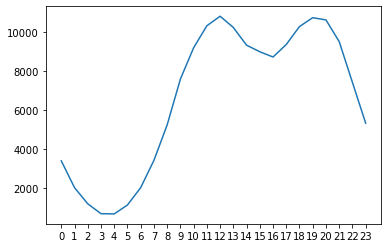

In [40]:
plt.plot(most_sales_hour['Order Hour'], most_sales_hour['Order ID'])
plt.xticks(most_sales_hour['Order Hour'],most_sales_hour['Order Hour'])
plt.plot()

## What products are most often sold together?

In [41]:
same_basket = df[df.duplicated(subset='Order ID', keep=False)].groupby(by=['Order ID','Product'],as_index=False).agg({'Quantity Ordered':sum})
same_basket

,Order ID,Product,Quantity Ordered
0,141235,Bose SoundSport Headphones,1
1,141235,Google Phone,1
2,141334,Lightning Charging Cable,1
3,141334,iPhone,1
4,141346,AAA Batteries (4-pack),3
...,...,...,...
12109,293098,Google Phone,1
12110,293152,Apple Airpods Headphones,1
12111,293152,Lightning Charging Cable,1
12112,293152,Wired Headphones,1


In [42]:
same_basket[['Order ID', 'Product']]

,Order ID,Product
0,141235,Bose SoundSport Headphones
1,141235,Google Phone
2,141334,Lightning Charging Cable
3,141334,iPhone
4,141346,AAA Batteries (4-pack)
...,...,...
12109,293098,Google Phone
12110,293152,Apple Airpods Headphones
12111,293152,Lightning Charging Cable
12112,293152,Wired Headphones


#### This process take a minute

In [ ]:
from itertools import combinations # C(r,n) eg. combinations('ABCD', 2) --> AB AC AD BC BD CD
from collections import defaultdict # for implement special dictionary that can add missing values

product_basket = defaultdict(set)
for i, j in same_basket[['Order ID', 'Product']].values.tolist(): # get subset of same basket products.
    product_basket[i].add(j)

# print(product_basket)

same_basket_cnt = defaultdict(int)
product_names = same_basket['Product'].unique()
# # loop to get subset of products in basket that have 'i' items
# # for i in range(2, len(product_names)):
for i in range(2, 6):
    subsets = combinations(set(product_names), i)  # get subset of 'i' items
    for subset in subsets:
        for k, v in product_basket.items(): # v is product basket, k is Order ID but not use
            if set(subset).issubset(set(v)):
                # print(subset)
                same_basket_cnt[tuple(subset)] += 1
# same_basket_cnt

In [43]:
list(reversed(sorted([[v, k] for k, v in same_basket_cnt.items()])))

[[898, ('iPhone', 'Lightning Charging Cable')],
 [871, ('Google Phone', 'USB-C Charging Cable')],
 [443, ('iPhone', 'Wired Headphones')],
 [291, ('iPhone', 'Apple Airpods Headphones')],
 [291, ('Wired Headphones', 'Google Phone')],
 [281, ('Vareebadd Phone', 'USB-C Charging Cable')],
 [170, ('Google Phone', 'Bose SoundSport Headphones')],
 [144, ('Wired Headphones', 'USB-C Charging Cable')],
 [129, ('Wired Headphones', 'Vareebadd Phone')],
 [107, ('Wired Headphones', 'Lightning Charging Cable')],
 [103, ('Apple Airpods Headphones', 'Lightning Charging Cable')],
 [98, ('Bose SoundSport Headphones', 'USB-C Charging Cable')],
 [96, ('USB-C Charging Cable', 'Lightning Charging Cable')],
 [94, ('AA Batteries (4-pack)', 'AAA Batteries (4-pack)')],
 [89, ('USB-C Charging Cable', 'AAA Batteries (4-pack)')],
 [74, ('AA Batteries (4-pack)', 'Lightning Charging Cable')],
 [73, ('Wired Headphones', 'Apple Airpods Headphones')],
 [73, ('USB-C Charging Cable', 'AA Batteries (4-pack)')],
 [71, ('Wire